17:39:53 - cmdstanpy - INFO - Chain [1] start processing
17:39:53 - cmdstanpy - INFO - Chain [1] done processing
/Users/apple/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/apple/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/apple/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime 

MAE: 326.2643260281897, RMSE: 382.25568573902274


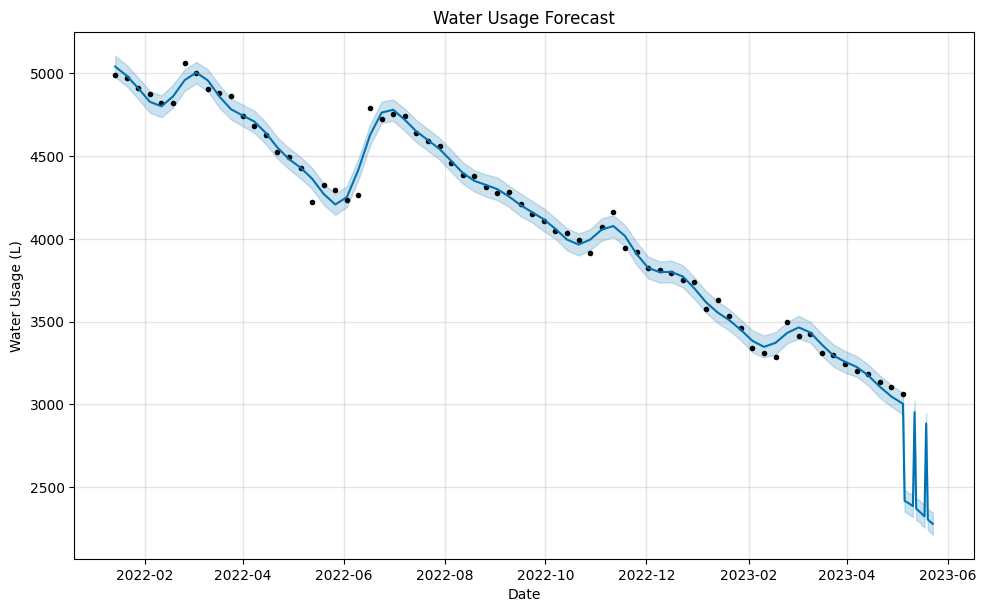

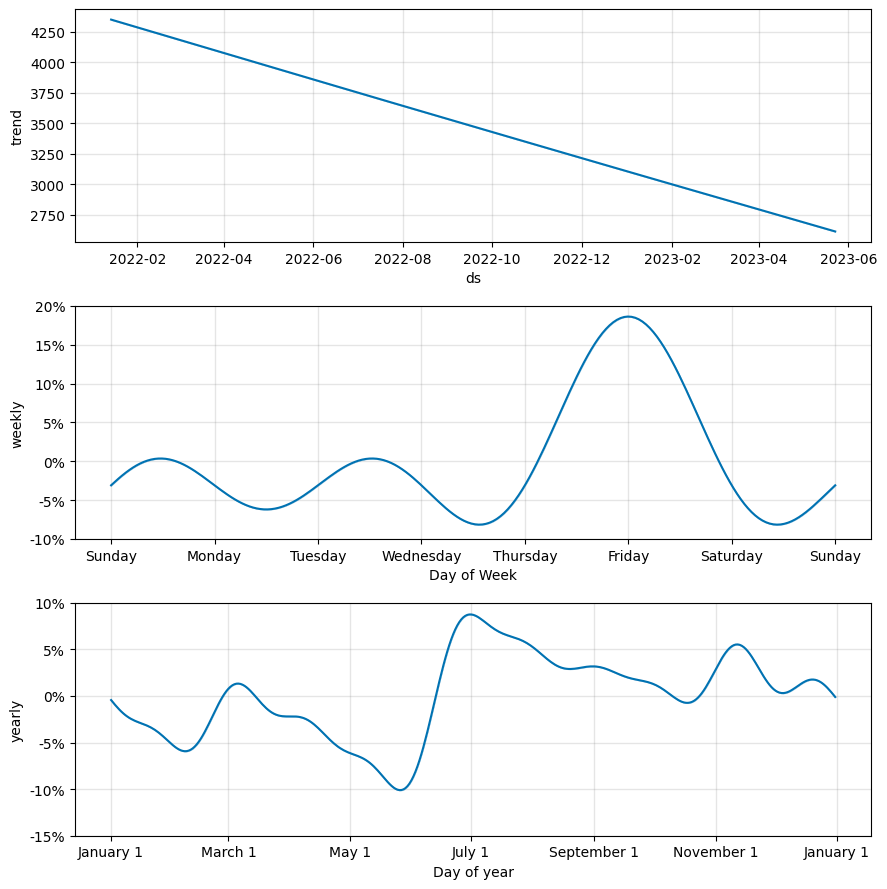

In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle

# Load the data
path = '/Users/apple/Desktop/Barrior/csv/us_weekly_consumable_water_summary_20220102-20230903.csv'  # Update with your file path
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
prophet_data = data[['Date', 'Corrected Total (L)']].rename(columns={'Date': 'ds', 'Corrected Total (L)': 'y'})

# Split data into training and testing sets (e.g., last 20% as test)
split_index = int(len(prophet_data) * 0.8)
train_data = prophet_data[:split_index]
test_data = prophet_data[split_index:]

# Initialize and train the Prophet model
model = Prophet(
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05 
    )
model.fit(train_data)

# Forecast on the training set and the future
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Water Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Water Usage (L)')

# Show components
fig2 = model.plot_components(forecast)

# Error Analysis on Test Data
test_forecast = forecast.iloc[split_index:]
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], test_forecast['yhat']))
print(f"MAE: {mae}, RMSE: {rmse}")

# Save the model
with open('water_usage_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the forecast
forecast.to_csv('water_usage_forecast.csv', index=False)
